In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_excel("KPMG_final.xlsx",sheet_name="CustomerDemographic",header=1)

In [3]:
df1.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [4]:
df1.customer_id.max()

4000

In [5]:
df1=df1[['customer_id',"gender","past_3_years_bike_related_purchases",'DOB','job_industry_category','wealth_segment','owns_car']]

In [6]:
df3=pd.read_excel("KPMG_final.xlsx",sheet_name="CustomerAddress",header=1)

In [7]:
df1['state']=df3['state']

In [8]:
df1.state.unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria', nan],
      dtype=object)

In [9]:
df1['state'].replace({'Victoria':'VIC'},inplace=True)

In [10]:
df1.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,state
0,1,F,93,1953-10-12,Health,Mass Customer,Yes,New South Wales
1,2,Male,81,1980-12-16,Financial Services,Mass Customer,Yes,New South Wales
2,3,Male,61,1954-01-20,Property,Mass Customer,Yes,QLD
3,4,Male,33,1961-10-03,IT,Mass Customer,No,New South Wales
4,5,Female,56,1977-05-13,NaN,Affluent Customer,Yes,VIC


In [11]:
df1.state.unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', nan], dtype=object)

In [12]:
df1['Age']=df1['DOB'].apply(lambda x: pd.to_datetime('today').year - x.year )

In [13]:
def grouper(age):
    if age<=25:
        return "young"
    elif age>25 and age<=50:
        return "adult"
    elif age>50 and age<=75:
        return "senior_citizen"
    else:
        return "old"

In [14]:
df1['Age_group']=df1['Age'].apply(lambda x:grouper(x))

In [15]:
df1['gender'].replace({'F':'Female','M':'Male','Femal':'Female'},inplace=True)

In [16]:
df1.gender.unique()

array(['Female', 'Male', 'U'], dtype=object)

In [17]:
df2=pd.read_excel("KPMG_final.xlsx",sheet_name="NewCustomerList",header=1)
df2.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [18]:
df2=df2[['gender','past_3_years_bike_related_purchases','DOB','job_industry_category','wealth_segment','owns_car','state']]

In [19]:
df2['Age']=df2['DOB'].apply(lambda x:pd.to_datetime('today').year-x.year)

In [20]:
df2['Age_group']=df2['Age'].apply(lambda x:grouper(x))

In [21]:
len(df2)

1000

In [22]:
df2['customer_id']=pd.Series(range(4001,5001))

In [23]:
df2.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,state,Age,Age_group,customer_id
0,Male,86,1957-07-12,Manufacturing,Mass Customer,Yes,QLD,63.0,senior_citizen,4001
1,Male,69,1970-03-22,Property,Mass Customer,No,NSW,50.0,adult,4002
2,Female,10,1974-08-28,Financial Services,Affluent Customer,No,VIC,46.0,adult,4003
3,Female,64,1979-01-28,Manufacturing,Affluent Customer,Yes,QLD,41.0,adult,4004
4,Female,34,1965-09-21,Financial Services,Affluent Customer,No,NSW,55.0,senior_citizen,4005


In [24]:
df2.customer_id.max()

5000

In [25]:
cols=list(df1.columns)

In [26]:
cols

['customer_id',
 'gender',
 'past_3_years_bike_related_purchases',
 'DOB',
 'job_industry_category',
 'wealth_segment',
 'owns_car',
 'state',
 'Age',
 'Age_group']

In [27]:
df2=df2[cols]

In [28]:
df2.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,state,Age,Age_group
0,4001,Male,86,1957-07-12,Manufacturing,Mass Customer,Yes,QLD,63.0,senior_citizen
1,4002,Male,69,1970-03-22,Property,Mass Customer,No,NSW,50.0,adult
2,4003,Female,10,1974-08-28,Financial Services,Affluent Customer,No,VIC,46.0,adult
3,4004,Female,64,1979-01-28,Manufacturing,Affluent Customer,Yes,QLD,41.0,adult
4,4005,Female,34,1965-09-21,Financial Services,Affluent Customer,No,NSW,55.0,senior_citizen


In [29]:
df1.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,state,Age,Age_group
0,1,Female,93,1953-10-12,Health,Mass Customer,Yes,New South Wales,67.0,senior_citizen
1,2,Male,81,1980-12-16,Financial Services,Mass Customer,Yes,New South Wales,40.0,adult
2,3,Male,61,1954-01-20,Property,Mass Customer,Yes,QLD,66.0,senior_citizen
3,4,Male,33,1961-10-03,IT,Mass Customer,No,New South Wales,59.0,senior_citizen
4,5,Female,56,1977-05-13,NaN,Affluent Customer,Yes,VIC,43.0,adult


In [30]:
df=pd.concat([df1,df2],axis=0)

In [31]:
df.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,state,Age,Age_group
0,1,Female,93,1953-10-12,Health,Mass Customer,Yes,New South Wales,67.0,senior_citizen
1,2,Male,81,1980-12-16,Financial Services,Mass Customer,Yes,New South Wales,40.0,adult
2,3,Male,61,1954-01-20,Property,Mass Customer,Yes,QLD,66.0,senior_citizen
3,4,Male,33,1961-10-03,IT,Mass Customer,No,New South Wales,59.0,senior_citizen
4,5,Female,56,1977-05-13,NaN,Affluent Customer,Yes,VIC,43.0,adult


In [ ]:
df.to_excel

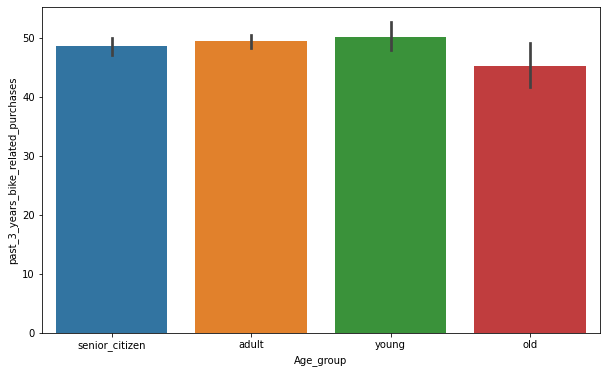

In [38]:
plt.figure(figsize=(10,6))
ax=sb.barplot(x=df['Age_group'],y=df['past_3_years_bike_related_purchases'])


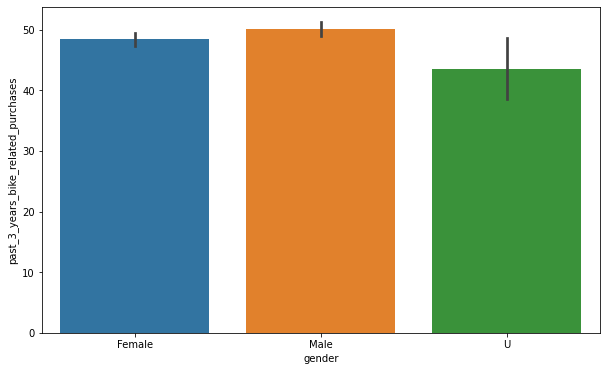

In [39]:
plt.figure(figsize=(10,6))
ax=sb.barplot(x=df['gender'],y=df['past_3_years_bike_related_purchases'])


In [55]:
len(df)

5000

In [68]:
len(df[df['state']=='NSW'])

2646

In [99]:
len(df[df['state']=='VIC'])

1287

In [69]:
x=df[df['state']=='NSW']

In [71]:
len(x[x['Age_group']=='adult'])

1469

In [73]:
x1=x[x['Age_group']=='adult']

In [72]:
len(x[x['Age_group']=='senior_citizen'])

802

In [74]:
x2=x[x['Age_group']=='senior_citizen']

In [76]:
len(x1[x1['job_industry_category']'Financial Services'])

308

In [77]:
x1_1=x1[x1['job_industry_category']=='Financial Services']

In [78]:
len(x1[x1['job_industry_category']=='Manufacturing'])

285

In [79]:
x1_2=x1[x1['job_industry_category']=='Manufacturing']

In [85]:
len(x1[x1['job_industry_category']=='Health'])

226

In [86]:
x1_3=x1[x1['job_industry_category']=='Health']

In [80]:
len(x2[x2['job_industry_category']=='Financial Services'])

130

In [81]:
x2_1=x2[x2['job_industry_category']=='Financial Services']

In [82]:
len(x2[x2['job_industry_category']=='Manufacturing'])

167

In [83]:
x2_2=x2[x2['job_industry_category']=='Manufacturing']

In [88]:
len(x2[x2['job_industry_category']=='Health'])

137

In [89]:
x2_3=x2[x2['job_industry_category']=='Health']

In [91]:
len(x1_1[x1_1['wealth_segment']=='Mass Customer'])

168

In [101]:
x1_1_1=x1_1[x1_1['wealth_segment']=='Mass Customer']

In [92]:
len(x1_2[x1_2['wealth_segment']=='Mass Customer'])

141

In [100]:
x1_2_1=x1_2[x1_2['wealth_segment']=='Mass Customer']

In [93]:
len(x1_3[x1_3['wealth_segment']=='Mass Customer'])

116

In [102]:
x1_3_1=x1_3[x1_3['wealth_segment']=='Mass Customer']

In [103]:
len(x2_1[x2_1['wealth_segment']=='Mass Customer'])

68

In [104]:
x2_1_1=x2_1[x2_1['wealth_segment']=='Mass Customer']

In [105]:
len(x2_2[x2_2['wealth_segment']=='Mass Customer'])

82

In [106]:
x2_2_1=x2_2[x2_2['wealth_segment']=='Mass Customer']

In [107]:
len(x2_3[x2_3['wealth_segment']=='Mass Customer'])

75

In [133]:
x2_3_1=x2_3[x2_3['wealth_segment']=='Mass Customer']

In [134]:
df_final=pd.concat([x1_1_1,x1_2_1,x1_3_1,x2_1_1,x2_2_1,x2_3_1],axis=0)

In [136]:
len(df_final)

650

In [108]:
y=df[df['state']=='VIC']

In [109]:
len(y[y['Age_group']=='adult'])

699

In [110]:
y1=y[y['Age_group']=='adult']

In [112]:
len(y[y['Age_group']=='senior_citizen'])

360

In [113]:
y2=y[y['Age_group']=='senior_citizen']

In [114]:
len(y1[y1['job_industry_category']=='Financial Services'])

143

In [115]:
y1_1=y1[y1['job_industry_category']=='Financial Services']

In [116]:
len(y1[y1['job_industry_category']=='Manufacturing'])

155

In [117]:
y1_2=y1[y1['job_industry_category']=='Manufacturing']

In [118]:
len(y1[y1['job_industry_category']=='Health'])

99

In [119]:
y1_3=y1[y1['job_industry_category']=='Health']

In [120]:
len(y2[y2['job_industry_category']=='Financial Services'])

74

In [121]:
y2_1=y2[y2['job_industry_category']=='Financial Services']

In [122]:
len(y2[y2['job_industry_category']=='Manufacturing'])

70

In [123]:
y2_2=y2[y2['job_industry_category']=='Manufacturing']

In [124]:
len(y2[y2['job_industry_category']=='Health'])

57

In [125]:
y2_3=y2[y2['job_industry_category']=='Health']

In [126]:
len(y1_1[y1_1['wealth_segment']=='Mass Customer'])

64

In [142]:
y1_1_1=y1_1[y1_1['wealth_segment']=='Mass Customer']

In [127]:
len(y1_2[y1_2['wealth_segment']=='Mass Customer'])

74

In [141]:
y1_2_1=y1_2[y1_2['wealth_segment']=='Mass Customer']

In [128]:
len(y1_3[y1_3['wealth_segment']=='Mass Customer'])

46

In [140]:
y1_3_1=y1_3[y1_3['wealth_segment']=='Mass Customer']

In [129]:
len(y2_1[y2_1['wealth_segment']=='Mass Customer'])

36

In [139]:
y2_1_1=y2_1[y2_1['wealth_segment']=='Mass Customer']

In [130]:
len(y2_2[y2_2['wealth_segment']=='Mass Customer'])

35

In [138]:
y2_2_1=y2_2[y2_2['wealth_segment']=='Mass Customer']

In [131]:
len(y2_3[y2_3['wealth_segment']=='Mass Customer'])

25

In [137]:
y2_3_1=y2_3[y2_3['wealth_segment']=='Mass Customer']

In [143]:
df_final=pd.concat([df_final,y1_1_1,y1_2_1,y1_3_1,y2_1_1,y2_2_1,y2_3_1],axis=0)

In [144]:
len(df_final)

930